In [46]:
from langchain.chat_models import ChatOpenAI
from langchain_groq import ChatGroq
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain
import sympy as sympy

In [47]:
import matplotlib.pyplot as plt

In [48]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [49]:
# 1. Load the LLM
llm=ChatGroq(model="llama-3.1-8b-instant",temperature=0)

In [50]:
"""
# 2. Define a prompt to turn natural language into a math expression
prompt = ChatPromptTemplate.from_template(
    "Convert the following instruction into a SymPy-compatible mathematical expression:\n\nInstruction: {user_input}\n\nExpression:"
)
"""

'\n# 2. Define a prompt to turn natural language into a math expression\nprompt = ChatPromptTemplate.from_template(\n    "Convert the following instruction into a SymPy-compatible mathematical expression:\n\nInstruction: {user_input}\n\nExpression:"\n)\n'

In [51]:
# Prompt to generate LaTeX
prompt = ChatPromptTemplate.from_template(
    "Convert the following instruction into a LaTeX-compatible mathematical expression:\nInstruction: {user_input}\n\nLaTeX:"
)

In [52]:
# 3. Create the LangChain chain
#chain = LLMChain(llm=llm, prompt=prompt)
chain=prompt | llm

In [53]:
# # Sample input
#user_input = "Integrate sin(x^2) dx"
user_input="derivative of ln(cos(x)) with respect to x"
# latex_expr = chain.run({"user_input": user_input})
###
#latex_expr = chain.invoke({"user_input": user_input})
###
latex_expr = chain.invoke({"user_input": user_input}).content

In [37]:
# Display LaTeX in a matplotlib figure
#plt.figure(figsize=(6, 2))
#plt.axis("off")
#plt.text(0.5, 0.5, f"${latex_expr.strip()}$", fontsize=20, ha='center', va='center')
#plt.show()

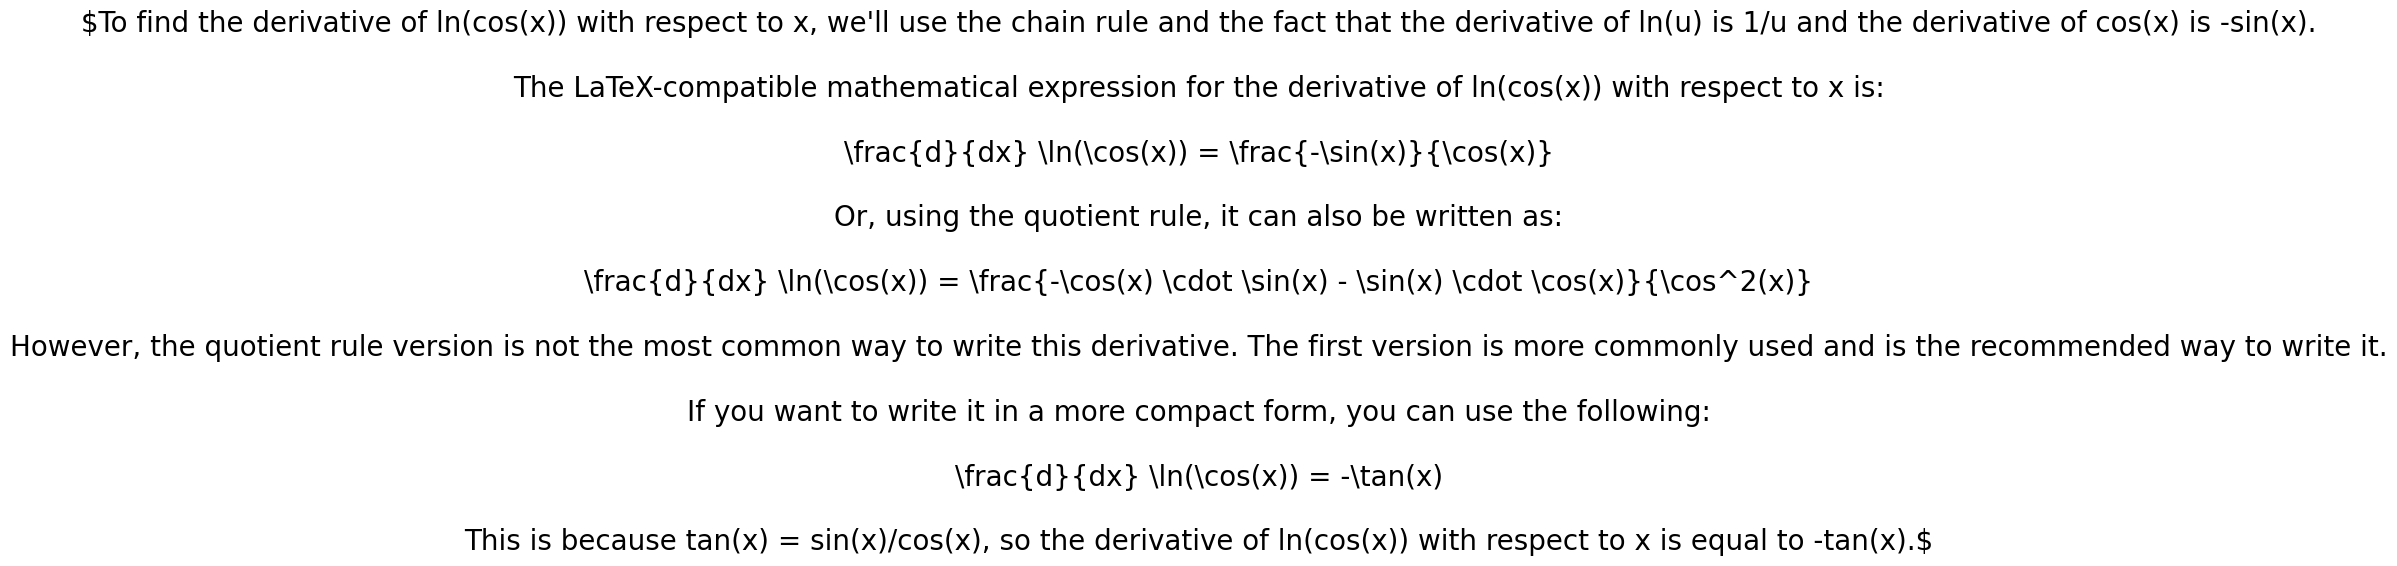

In [54]:

cleaner_expr=latex_expr.replace('$$', '') 
# Display LaTeX in a matplotlib figure
plt.figure(figsize=(6, 2))
plt.axis("off")
plt.text(0.5, 0.5, f"${cleaner_expr.strip()}$", fontsize=20, ha='center', va='center')
plt.show()

In [55]:
print(latex_expr)

To find the derivative of ln(cos(x)) with respect to x, we'll use the chain rule and the fact that the derivative of ln(u) is 1/u and the derivative of cos(x) is -sin(x).

The LaTeX-compatible mathematical expression for the derivative of ln(cos(x)) with respect to x is:

$$\frac{d}{dx} \ln(\cos(x)) = \frac{-\sin(x)}{\cos(x)}$$

Or, using the quotient rule, it can also be written as:

$$\frac{d}{dx} \ln(\cos(x)) = \frac{-\cos(x) \cdot \sin(x) - \sin(x) \cdot \cos(x)}{\cos^2(x)}$$

However, the quotient rule version is not the most common way to write this derivative. The first version is more commonly used and is the recommended way to write it.

If you want to write it in a more compact form, you can use the following:

$$\frac{d}{dx} \ln(\cos(x)) = -\tan(x)$$

This is because tan(x) = sin(x)/cos(x), so the derivative of ln(cos(x)) with respect to x is equal to -tan(x).


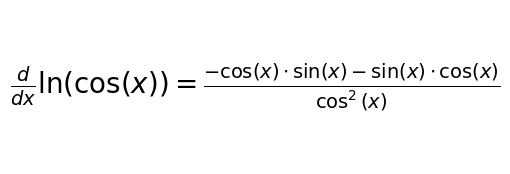

In [40]:
latex_expr=r"\frac{d}{dx} \ln(\cos(x)) = \frac{-\cos(x) \cdot \sin(x) - \sin(x) \cdot \cos(x)}{\cos^2(x)}"
plt.figure(figsize=(6, 2))
plt.axis("off")
plt.text(0.5, 0.5, f"${latex_expr.strip()}$", fontsize=20, ha='center', va='center')
#plt.text(0.5, 0.5, f"${latex_expr.strip()}$", fontsize=20, ha='center', va='center')
plt.show()

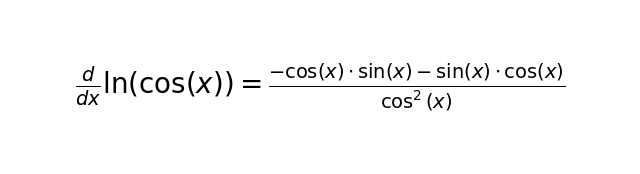

In [41]:


latex_expr = r"\frac{d}{dx} \ln(\cos(x)) = \frac{-\cos(x) \cdot \sin(x) - \sin(x) \cdot \cos(x)}{\cos^2(x)}"

plt.figure(figsize=(8, 2))
plt.axis("off")

# Note: The expression must be wrapped in $...$ for LaTeX rendering
plt.text(0.5, 0.5, f"${latex_expr}$", fontsize=20, ha='center', va='center')

plt.show()


In [42]:
print(latex_expr)

\frac{d}{dx} \ln(\cos(x)) = \frac{-\cos(x) \cdot \sin(x) - \sin(x) \cdot \cos(x)}{\cos^2(x)}


In [43]:
import re
matches = re.findall(r'(\\frac\{d\}\{dx\}.*?)(?=\n\s*\n|$)', latex_expr, flags=re.DOTALL)
matches

['\\frac{d}{dx} \\ln(\\cos(x)) = \\frac{-\\cos(x) \\cdot \\sin(x) - \\sin(x) \\cdot \\cos(x)}{\\cos^2(x)}']

In [44]:
for i, match in enumerate(matches, 1):
    print(f"Expression {i}: {match}")

Expression 1: \frac{d}{dx} \ln(\cos(x)) = \frac{-\cos(x) \cdot \sin(x) - \sin(x) \cdot \cos(x)}{\cos^2(x)}


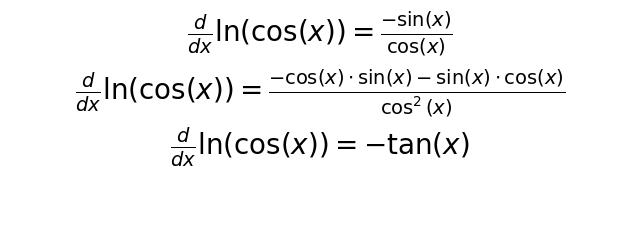

In [56]:
import re
matches = re.findall(r'(\\frac\{d\}\{dx\}.*?)(?=\n\s*\n|$)', latex_expr, flags=re.DOTALL)
plt.figure(figsize=(8, len(matches)))  # Adjust height to number of expressions
plt.axis("off")

for i, expr in enumerate(matches):
    # Adjust y-position from top to bottom
    clean_expr = expr.strip().strip('$')
    plt.text(0.5, 1 - i * 0.25, f"${clean_expr}$", fontsize=20, ha='center', va='top')


plt.show()